# ESTUDIO DE CASO : ANÁLALISIS EXPLORADOTIRO DE DATOS

#### 0. EL PROBLEMA DEL NEGOCIO 

La empresa A&A Ltda, empieza un proceso de implementación de Machine Learning, usted ha sido designado para una de las tareas más importante dentro del proyecto, el cual consisten en realizar el análisis exploratorio de los datos y documentar los resultados encontrados, generando un informe que involucre los procedimientos y los resultados.

El archivo que se analizara corresponde a precios de viviendas y locales para la venta y la colección de datos cuenta con variables que se ven involucradas en ese valor.

#### 1. PREGUNTA A RESPONDER

¿De que depende el precios de venta de una vivienda o local ?

#### 2. GENERALIDADES DEL DATASET

#### 3. LECTURA DEL DATASET 

In [4]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lectura
ruta = "./Curso Sena/datos/Inmuebles_Disponibles_Para_La_Venta.csv"
data = pd.read_csv(ruta)

In [23]:
 # Total de Registros y total de columnas
print(data.shape)
data.head()

(448, 12)


,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,2330,BOGOTA,CUNDINAMARCA,SANTA MATILDE,CL 10 SUR # 34B-24 LT 2 MZ X-46 (SANTA MATILDE...,559804,0,COMERCIALIZABLE CON RESTRICCION,TRES,134280960000000,LOTE VIVIENDA,NaN
1,2363,BOGOTA,CUNDINAMARCA,TINTALA,KR 84 CON CL 10 LT # 8 DE SAN JUAN DE CASTILLA...,302079,0,COMERCIALIZABLE CON RESTRICCION,TRES,32857503970000,LOTE COMERCIAL,"ESTE INMUEBLE PRESENTA ZONA DE RESERVA VIAL, Q..."
2,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,165508,726900,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,147133144000000,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
3,2669,LA CALERA,CUNDINAMARCA,LA CALERA,LOTE 3 PARCELACIÓN LOS CERROS HACIENDA SAN RAFAEL,3000000,0,COMERCIALIZABLE CON RESTRICCION,RURAL,5520000000000,LOTE VIVIENDA,NaN
4,4408,BOGOTA,CUNDINAMARCA,SUBA,DG 140 # 67 - 30 IN 6 (ZONA DE AFECTACIÓN PLAN...,1774266,0,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,138038206000000,LOTE VIVIENDA,NaN


In [25]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Codigo                  448 non-null    int64 
 1   Ciudad                  448 non-null    object
 2   Departamento            448 non-null    object
 3   Barrio                  59 non-null     object
 4   Direccion               448 non-null    object
 5   Area Terreno            448 non-null    int64 
 6   Area Construida         448 non-null    int64 
 7   Detalle Disponibilidad  448 non-null    object
 8   Estrato                 448 non-null    object
 9   Precio                  448 non-null    int64 
 10  Tipo de Inmueble        448 non-null    object
 11  Datos Adicionales       77 non-null     object
dtypes: int64(4), object(8)
memory usage: 42.1+ KB


#### 4. LIMPIEZA DE LOS DATOS

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

##### 4.1 Datos faltantes
Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.
El número total de registros debería ser 463. Sin embargo columnas como "Barrio", tiene solo 40 y la columna "Datos Adicionales" Tiene 118
Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

##### 4.2 Columnas Irrelevantes
No se identifican columnas irrelevantes porque todas pueden incidir en el precio de la vivienda o local

In [26]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Ciudad', 'Departamento', 'Barrio', 'Direccion', 'Detalle Disponibilidad','Estrato', 'Tipo de Inmueble', 'Datos Adicionales']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna Ciudad: 48 subniveles
Columna Departamento: 15 subniveles
Columna Barrio: 24 subniveles
Columna Direccion: 435 subniveles
Columna Detalle Disponibilidad: 7 subniveles
Columna Estrato: 9 subniveles
Columna Tipo de Inmueble: 19 subniveles
Columna Datos Adicionales: 52 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [27]:
# Muestra todas las columnas numericas
data.describe()

,Codigo,Area Terreno,Area Construida,Precio
count,448.000000,4.480000e+02,4.480000e+02,4.480000e+02
mean,17680.200893,1.619546e+06,1.155153e+04,9.372906e+12
std,2542.955951,1.858858e+07,1.285177e+05,3.817964e+13
min,2330.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,18128.750000,0.000000e+00,0.000000e+00,1.257250e+11
50%,18291.500000,0.000000e+00,0.000000e+00,1.652050e+11
75%,18472.000000,0.000000e+00,0.000000e+00,1.861440e+12
max,19353.000000,3.217197e+08,2.272400e+06,4.523379e+14


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

#### 4.3 Filas repetidas

In [28]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (448, 12)
Tamaño del set después de eliminar las filas repetidas: (448, 12)


####4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

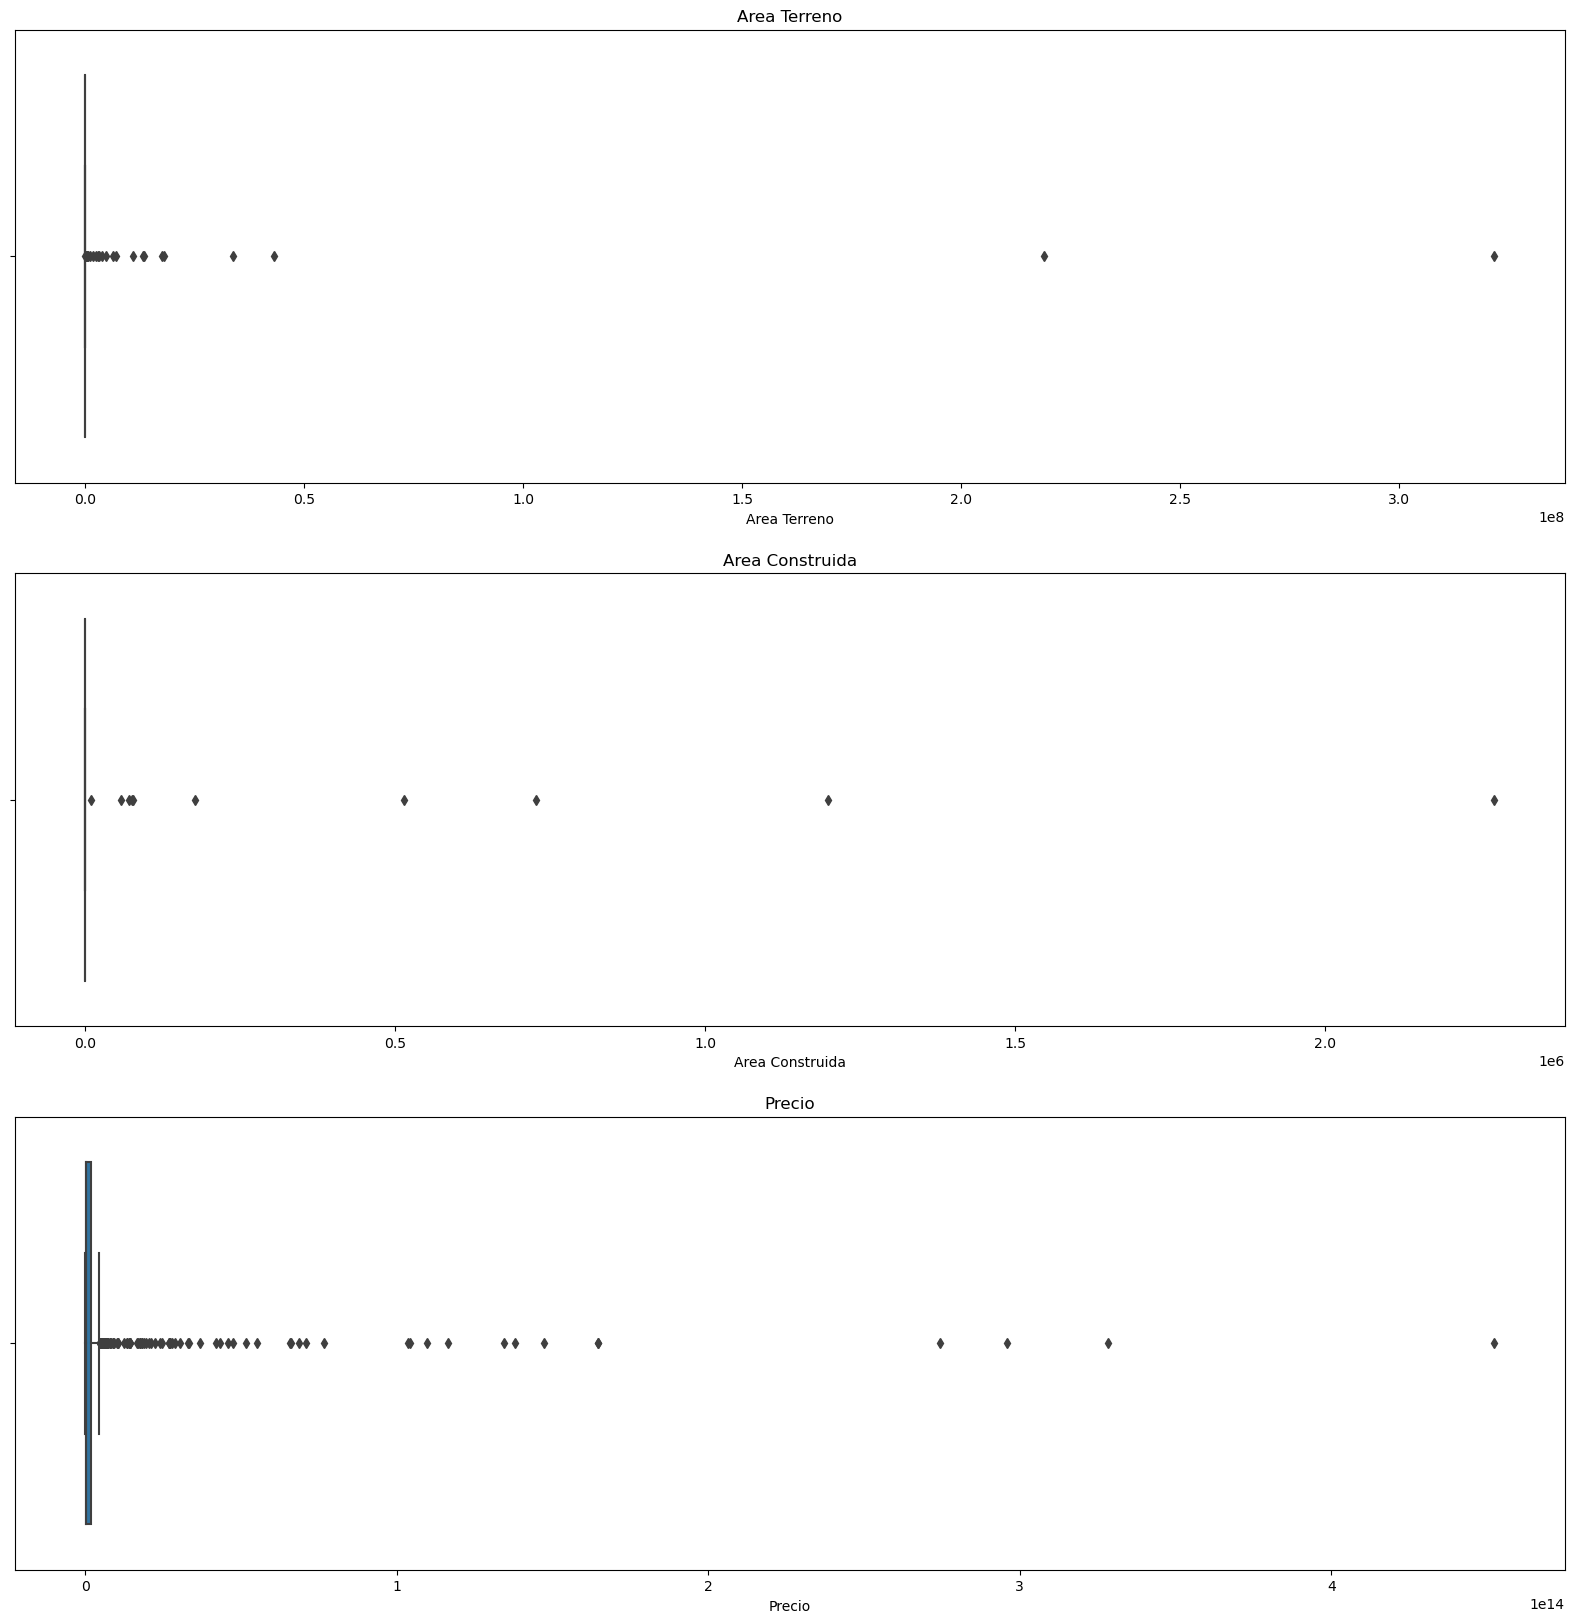

In [32]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['Area Terreno', 'Area Construida', 'Precio']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,20))
fig.subplots_adjust(hspace=0.2)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)